In [1]:
# coding=utf-8
import numpy as np
import random

# 使用numpy生成数组,得到ndarray的类型
t1 = np.array([1,2,3,])
print(t1)
print(type(t1))

t2 = np.array(range(10))
print(t2)
print(type(t2))

t3 = np.arange(4,10,2)
print(t3)
print(type(t3))

print(t3.dtype)
print("*"*100)

# numpy中的数据类型
t4 = np.array(range(1,4),dtype="i1")
print(t4)
print(t4.dtype)

# numpy中的bool类型
t5 = np.array([1,1,0,1,0,0],dtype=bool)
print(t5)
print(t5.dtype)

# 调整数据类型
t6 = t5.astype("int8")
print(t6)
print(t6.dtype)

# numpy中的小数
t7 = np.array([random.random() for i in range(10)])
print(t7)
print(t7.dtype)

t8 = np.round(t7,2)
print(t8)

[1 2 3]
<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>
[4 6 8]
<class 'numpy.ndarray'>
int32
****************************************************************************************************
[1 2 3]
int8
[ True  True False  True False False]
bool
[1 1 0 1 0 0]
int8
[0.13501505 0.77375929 0.50301965 0.76005832 0.35101609 0.55836523
 0.67812378 0.82651874 0.74322985 0.13267858]
float64
[0.14 0.77 0.5  0.76 0.35 0.56 0.68 0.83 0.74 0.13]


In [1]:
# coding=utf-8
import numpy as np

us_file_path = "../Resources/youtube_video_data/US_video_data_numbers.csv"
uk_file_path = "../Resources/youtube_video_data/GB_video_data_numbers.csv"

# 读取本地文件
# t1 = np.loadtxt(us_file_path,delimiter=",",dtype="int",unpack=True)
t2 = np.loadtxt(us_file_path,delimiter=",",dtype="int")

# print(t1)
print(t2)

print("*"*100)

#取行
# print(t2[2])

#取连续的多行
# print(t2[2:])

#取不连续的多行
# print(t2[[2,8,10]])

# print(t2[1,:])
# print(t2[2:,:])
# print(t2[[2,10,3],:])

#取列
# print(t2[:,0])

#取连续的多列
# print(t2[:,2:])

#取不连续的多列
# print(t2[:,[0,2]])

#去行和列，取第3行，第四列的值
# a = t2[2,3]
# print(a)
# print(type(a))

#取多行和多列，取第3行到第5行，第2列到第4列的结果
#去的是行和列交叉点的位置
b = t2[2:5,1:4]
# print(b)

#取多个不相邻的点
#选出来的结果是（0，0） （2，1） （2，3）
c = t2[[0,2,2],[0,1,3]]
print(c)

# 赋值
# t2[2:,3]=3
# 布尔索引
# t2[t>10]=10
# 三元运算符
# np.where(t>10,20,0) 把t中大于10的替换为20，其它的替换为0
# 裁剪
# t.clip(10,20) 把小于10的替换为10，大于20的替换为20
# 转置
# t.T
# t.transpose()
# t.swapaxes(1,0)

[[4394029  320053    5931   46245]
 [7860119  185853   26679       0]
 [5845909  576597   39774  170708]
 ...
 [ 142463    4231     148     279]
 [2162240   41032    1384    4737]
 [ 515000   34727     195    4722]]
****************************************************************************************************
[4394029  576597  170708]


**特殊字符：**

- inf: 表示无穷
- nan：不是一个数字
  - np.nan!=np.nan
  - np.count_nonzero(na.nan!=np.nan)
  - np.isnan(t1) 效果和np.nan!=np.nan相同

In [2]:
# coding=utf-8
import numpy as np

# print(t1)
def fill_ndarray(t1):
    for i in range(t1.shape[1]):  #遍历每一列
        temp_col = t1[:,i]  #当前的一列
        nan_num = np.count_nonzero(temp_col!=temp_col)
        if nan_num !=0: #不为0，说明当前这一列中有nan
            temp_not_nan_col = temp_col[temp_col==temp_col] #当前一列不为nan的array

            # 选中当前为nan的位置，把值赋值为不为nan的均值
            temp_col[np.isnan(temp_col)] = temp_not_nan_col.mean()
    return t1

if __name__ == '__main__':
    t1 = np.arange(24).reshape((4, 6)).astype("float")
    t1[1, 2:] = np.nan
    print(t1)
    t1 = fill_ndarray(t1)
    print(t1)

[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7. nan nan nan nan]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]]
[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7. 12. 13. 14. 15.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]]


4995 0


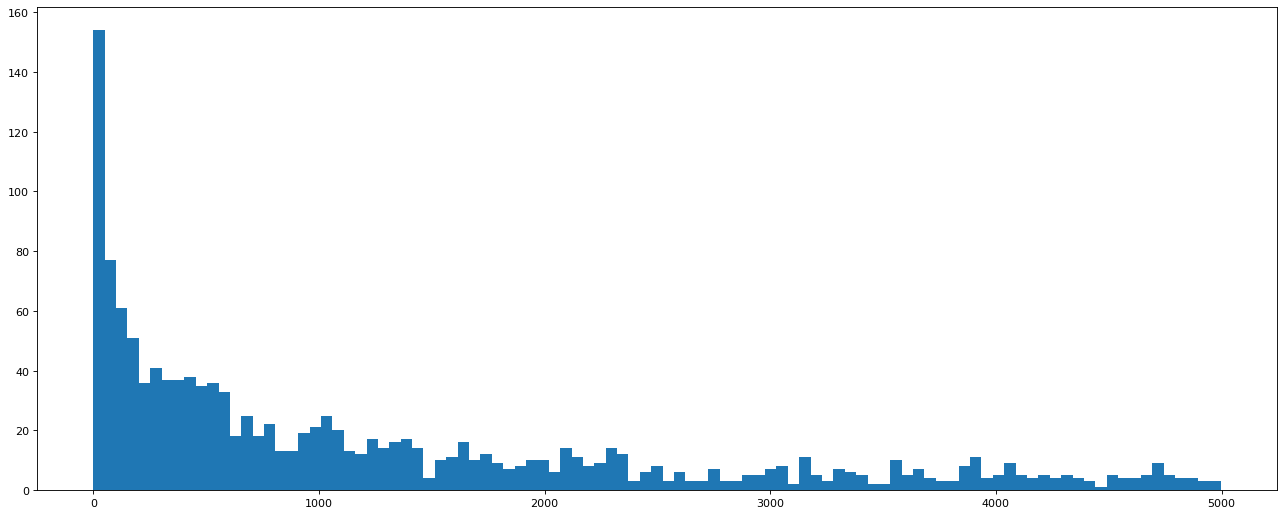

In [4]:
import numpy as np
from matplotlib import  pyplot as plt

us_file_path = "../Resources/youtube_video_data/US_video_data_numbers.csv"
uk_file_path = "../Resources/youtube_video_data/GB_video_data_numbers.csv"

# t1 = np.loadtxt(us_file_path,delimiter=",",dtype="int",unpack=True)
t_us = np.loadtxt(us_file_path,delimiter=",",dtype="int")

#取评论的数据
t_us_comments = t_us[:,-1]

#选择比5000小的数据
t_us_comments = t_us_comments[t_us_comments<=5000]
print(t_us_comments.max(),t_us_comments.min())

d = 50
bin_nums = (t_us_comments.max()-t_us_comments.min())//d

#绘图
plt.figure(figsize=(20,8),dpi=80)
plt.hist(t_us_comments,bin_nums)
plt.show()

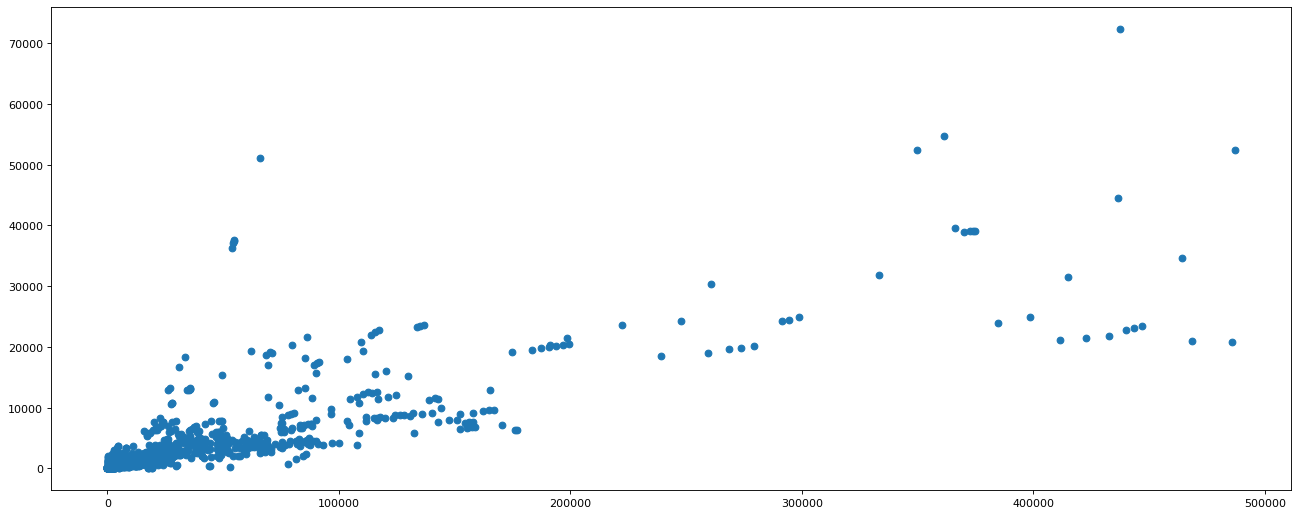

In [5]:
import numpy as np
from matplotlib import  pyplot as plt

us_file_path = "../Resources/youtube_video_data/US_video_data_numbers.csv"
uk_file_path = "../Resources/youtube_video_data/GB_video_data_numbers.csv"

# t1 = np.loadtxt(us_file_path,delimiter=",",dtype="int",unpack=True)
t_uk = np.loadtxt(uk_file_path,delimiter=",",dtype="int")

#选择喜欢书比50万小的数据
t_uk = t_uk[t_uk[:,1]<=500000]
t_uk_comment = t_uk[:,-1]
t_uk_like = t_uk[:,1]

plt.figure(figsize=(20,8),dpi=80)
plt.scatter(t_uk_like,t_uk_comment)
plt.show()

**常用的统计函数：**

- t.sum(axis=0)
- np.median(t,axis=0)
- t.mean(axis=0)
- t.max()
- t.mean()
- np.ptp 计算极差
- t.std 标准差反应数据的离散程度，稳定程度